In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#import the data
df_als2=pd.read_csv('als_data.csv')
df_als2.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
# Delete all the variables that are not realted to ALS based on the column name and take only the Age and Total Max values.
df_als3=df_als2[['Age_mean','ALSFRS_Total_max']]
df_als3.head()

,Age_mean,ALSFRS_Total_max
0,65,30
1,48,37
2,38,24
3,63,30
4,63,32


In [6]:
# Applying standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = StandardScaler().fit_transform(df_als3.values)
scaled_features_df_als2 = pd.DataFrame(scaled_features, index=df_als3.index, columns=df_als3.columns)
scaled_features_df_als2.head()

,Age_mean,ALSFRS_Total_max
0,0.917137,-0.318520
1,-0.574879,0.998995
2,-1.452535,-1.447819
3,0.741606,-0.318520
4,0.741606,0.057913


For n_clusters = 2 The average silhouette_score is : 0.34656007150923857
For n_clusters = 3 The average silhouette_score is : 0.37858214549301517
For n_clusters = 4 The average silhouette_score is : 0.34450976350005114
For n_clusters = 5 The average silhouette_score is : 0.3295885923557159
For n_clusters = 6 The average silhouette_score is : 0.33700816453657256


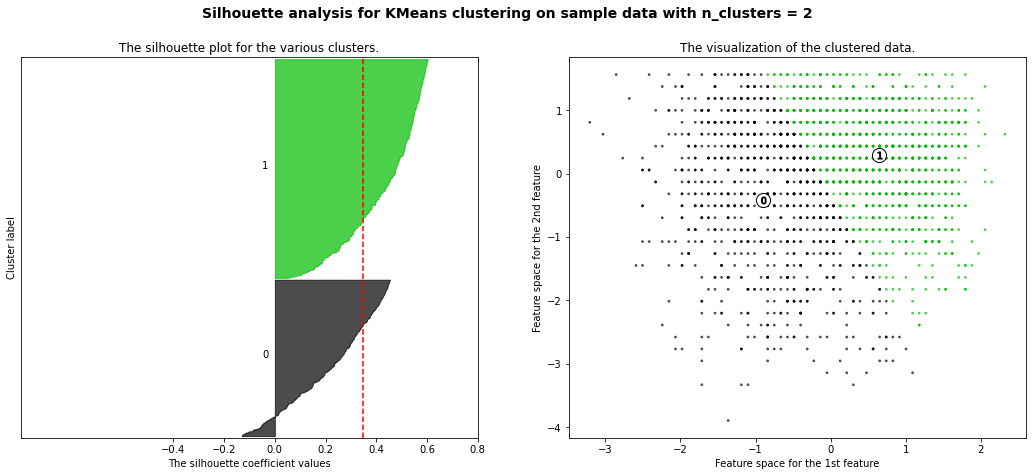

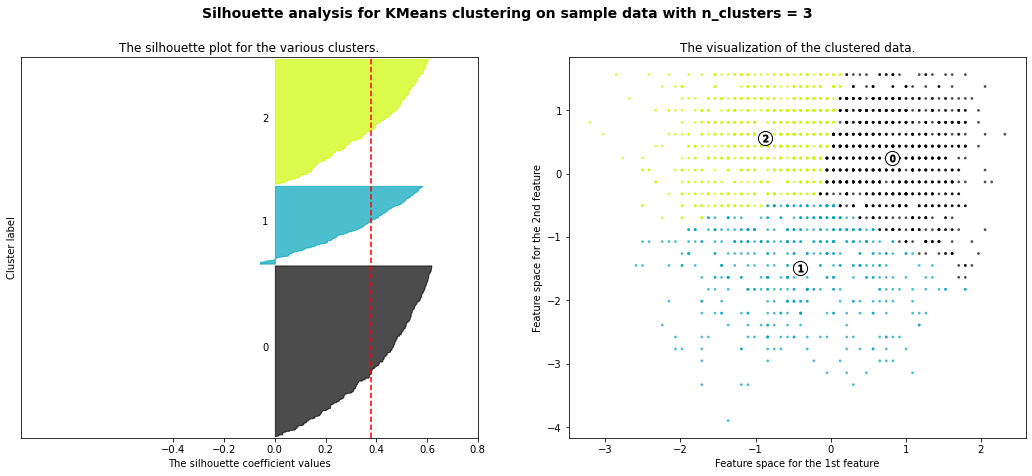

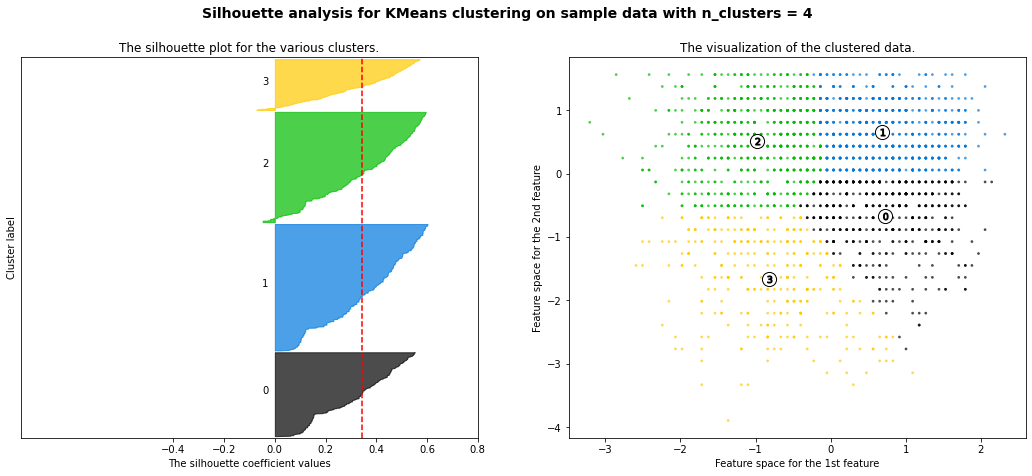

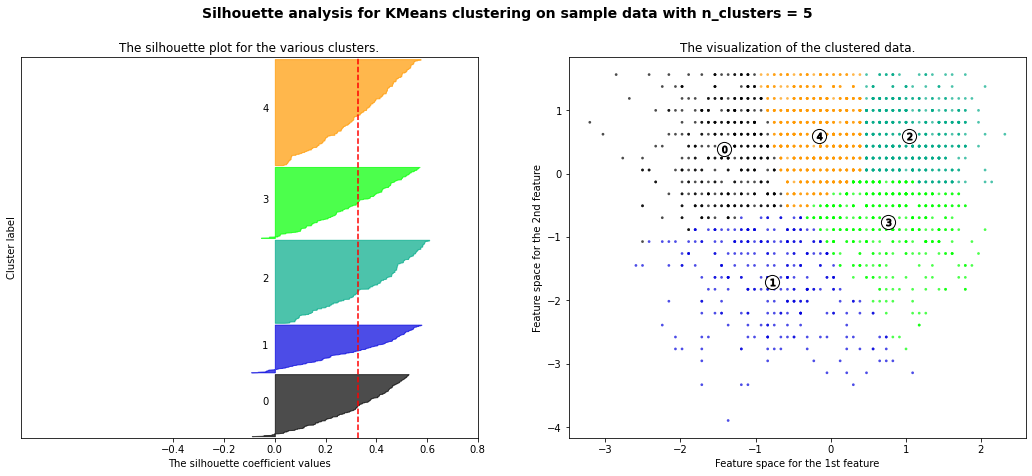

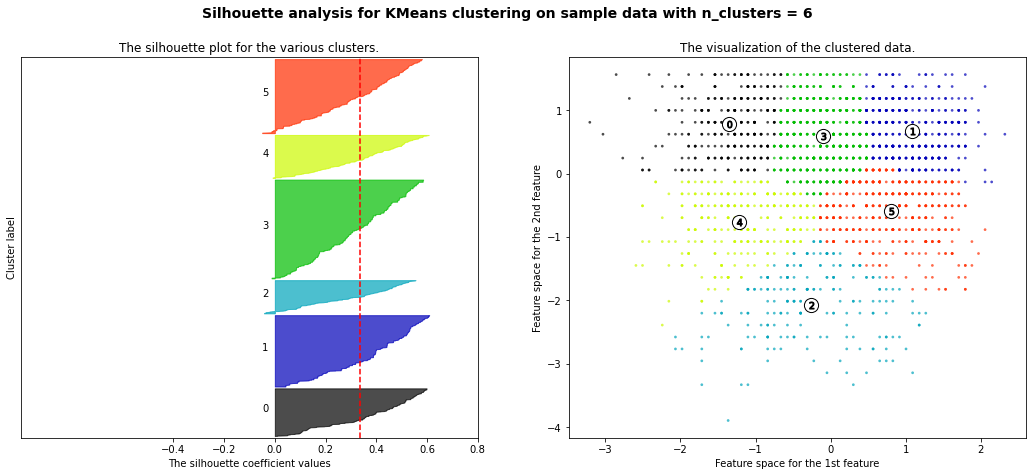

In [7]:
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 0.4])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df_als2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_features_df_als2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_features_df_als2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features_df_als2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4,0.6,0.8])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df_als2.iloc[:, 0], scaled_features_df_als2.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Based on the above plots. Cluster size=4 seems to be most appropriate than others as it stands well against all the three measuring criteria (scores below average Silhouette score, Wide fluctuations in the size of the plot, and non-uniform thickness). 

(2223, 2)
(2223,)


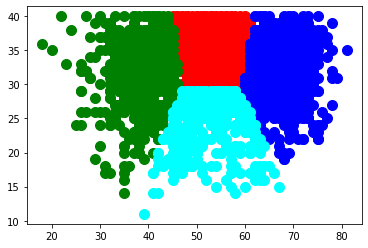

In [8]:
# Fit K-means model with clusters=4
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(df_als3)
print(df_als3.shape)
print(label.shape)
#Getting unique labels
u_labels = np.unique(label)
#print(scaled_features_df_als3[label==0])
#plotting the results:
#6 Visualising the clusters
plt.scatter(df_als3.iloc[label==0, 0], df_als3.iloc[label==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(df_als3.iloc[label==1, 0], df_als3.iloc[label==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(df_als3.iloc[label==2, 0], df_als3.iloc[label==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(df_als3.iloc[label==3, 0], df_als3.iloc[label==3, 1], s=100, c='cyan', label ='Cluster 4')

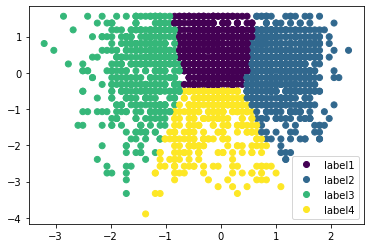

In [11]:
# PCA transformation with two features to the scaled data.

from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df_als3[['Age_mean','ALSFRS_Total_max']]
df_als3['target']=pd.Series(label)
y=df_als3['target']


features = ['Age_mean','ALSFRS_Total_max']
# Separating out the features
x = df_als3.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
targets = ['label1', 'label2', 'label3','label4']

from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf.head()

finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

import matplotlib.pyplot as plt
plot=plt.scatter(x[:,0], x[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=targets)
plt.show()

In [10]:
print(pca.explained_variance_ratio_)

[0.52452689 0.47547311]
